In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('./logs/DPT_coursework_go_logs.txt', 'r') as file:
    for line in file:
        print(line)


Dataset: 15000




Sequential run

Sum of Totients between 1 and 15000 is 68394315

Elapsed time 15.87856784



Num threads: 1

Elapsed time: 16.3222815233s



Num threads: 2

Elapsed time: 8.1717907233s



Num threads: 4

Elapsed time: 4.2742330333s



Num threads: 8

Elapsed time: 2.2165226667s



Num threads: 12

Elapsed time: 1.4795456267s



Num threads: 16

Elapsed time: 1.1211625967s



Num threads: 24

Elapsed time: 0.8731889200s



Num threads: 32

Elapsed time: 0.7212657067s



Num threads: 48

Elapsed time: 0.7188419700s



Num threads: 64

Elapsed time: 0.7191532400s




Dataset: 30000




Sequential run

Sum of Totients between 1 and 30000 is 273571773

Elapsed time 68.112589777



Num threads: 1

Elapsed time: 69.9471829400s



Num threads: 2

Elapsed time: 34.9300495567s



Num threads: 4

Elapsed time: 18.2632170600s



Num threads: 8

Elapsed time: 9.4671281000s



Num threads: 12

Elapsed time: 6.3176630307s



Num threads: 16

Elapsed time: 4.7515223267s



Num thre

In [3]:
with open('./logs/DPT_coursework_openmp_logs.txt', 'r') as file:
    for line in file:
        print(line)


Dataset: 15000




Sequential run

C: Sum of Totients  between [1..15000] is 68394315

Elapsed time 15.454646s



Num threads: 1

15.220749s

Num threads: 2

7.782046333333334s

Num threads: 4

4.010388333333333s

Num threads: 8

2.0661413333333334s

Num threads: 12

1.3811326666666666s

Num threads: 16

1.063452s

Num threads: 24

0.7947553333333334s

Num threads: 32

0.6463466666666666s

Num threads: 48

0.6437303333333333s

Num threads: 64

0.6442066666666667s


Dataset: 30000




Sequential run

C: Sum of Totients  between [1..30000] is 273571773

Elapsed time 65.436309s



Num threads: 1

65.369055s

Num threads: 2

32.62884066666667s

Num threads: 4

17.072575333333333s

Num threads: 8

8.854436666666667s

Num threads: 12

5.902656333333334s

Num threads: 16

4.429906666666667s

Num threads: 24

3.391373s

Num threads: 32

2.748571s

Num threads: 48

2.746369s

Num threads: 64

2.747683s


Dataset: 60000




Sequential run

C: Sum of Totients  between [1..60000] is 1094277505

E

In [4]:
go_data = dict()

with open('./logs/DPT_coursework_go_logs.txt', 'r') as file:      
    for line in file:
        if line.find('Dataset') != -1:
            ds = line.split()[1]
            go_data[ds] = dict()
        if line.find('Sequential') != -1:
            key = 'sequential'
        if line.find('Num threads') != -1:
            key = line.split()[-1]
        if line.find('Elapsed time') != -1:
            go_data[ds][key] = float(line.split()[-1][:-1])
            

In [5]:
go_data

{'15000': {'sequential': 15.8785678,
  '1': 16.3222815233,
  '2': 8.1717907233,
  '4': 4.2742330333,
  '8': 2.2165226667,
  '12': 1.4795456267,
  '16': 1.1211625967,
  '24': 0.87318892,
  '32': 0.7212657067,
  '48': 0.71884197,
  '64': 0.71915324},
 '30000': {'sequential': 68.11258977,
  '1': 69.94718294,
  '2': 34.9300495567,
  '4': 18.26321706,
  '8': 9.4671281,
  '12': 6.3176630307,
  '16': 4.7515223267,
  '24': 3.7153956667,
  '32': 3.0509906433,
  '48': 3.0529939733,
  '64': 3.0517960833},
 '60000': {'sequential': 289.15718267,
  '1': 297.4348201467,
  '2': 153.2569007667,
  '4': 78.71333488,
  '8': 41.1265750033,
  '12': 27.2374247333,
  '16': 20.4429308233,
  '24': 15.9412904133,
  '32': 12.95170291,
  '48': 13.51146495,
  '64': 13.0108615}}

In [6]:
pd.DataFrame(go_data)

,15000,30000,60000
1,16.322282,69.947183,297.434820
12,1.479546,6.317663,27.237425
16,1.121163,4.751522,20.442931
2,8.171791,34.930050,153.256901
24,0.873189,3.715396,15.941290
32,0.721266,3.050991,12.951703
4,4.274233,18.263217,78.713335
48,0.718842,3.052994,13.511465
64,0.719153,3.051796,13.010862
8,2.216523,9.467128,41.126575


In [7]:
openmp_data = dict()

with open('./logs/DPT_coursework_openmp_logs.txt', 'r') as file:      
    for line in file:
        if line.find('Dataset') != -1:
            ds = line.split()[1]
            openmp_data[ds] = dict()
        if line.find('Sequential') != -1:
            key = 'sequential'
        if line.find('Num threads') != -1:
            key = line.split()[-1]
        if line.find('Elapsed time') != -1:
            openmp_data[ds][key] = float(line.split()[-1][:-1])
        if len(line.split()) == 1 and line.split()[0].find('=') == -1:
            openmp_data[ds][key] = float(line.split()[-1][:-1])

            

In [8]:
openmp_data

{'15000': {'sequential': 15.454646,
  '1': 15.220749,
  '2': 7.782046333333334,
  '4': 4.010388333333333,
  '8': 2.0661413333333334,
  '12': 1.3811326666666666,
  '16': 1.063452,
  '24': 0.7947553333333334,
  '32': 0.6463466666666666,
  '48': 0.6437303333333333,
  '64': 0.6442066666666667},
 '30000': {'sequential': 65.436309,
  '1': 65.369055,
  '2': 32.62884066666667,
  '4': 17.072575333333333,
  '8': 8.854436666666667,
  '12': 5.902656333333334,
  '16': 4.429906666666667,
  '24': 3.391373,
  '32': 2.748571,
  '48': 2.746369,
  '64': 2.747683},
 '60000': {'sequential': 278.271561,
  '1': 278.34274966666663,
  '2': 139.47200366666667,
  '4': 72.756587,
  '8': 37.78085766666667,
  '12': 25.188376,
  '16': 18.89380166666667,
  '24': 14.451882666666666,
  '32': 11.698912333333334,
  '48': 11.697899333333334,
  '64': 11.698500666666666}}

In [9]:
pd.DataFrame(openmp_data)

,15000,30000,60000
1,15.220749,65.369055,278.342750
12,1.381133,5.902656,25.188376
16,1.063452,4.429907,18.893802
2,7.782046,32.628841,139.472004
24,0.794755,3.391373,14.451883
32,0.646347,2.748571,11.698912
4,4.010388,17.072575,72.756587
48,0.643730,2.746369,11.697899
64,0.644207,2.747683,11.698501
8,2.066141,8.854437,37.780858


In [15]:
dataset_mappings = {'15000': 'DS1',
                    '30000': 'DS2',
                    '60000': 'DS3'}

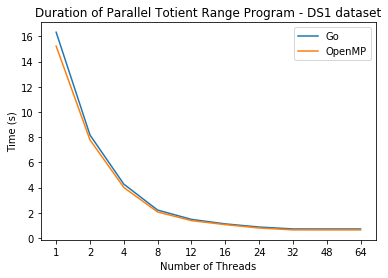

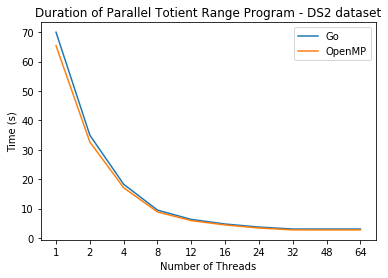

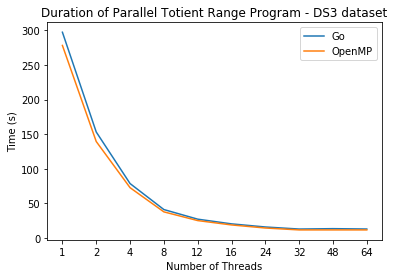

In [16]:
for data_set, times in go_data.items():
    plt.figure()
    plt.title(f'Duration of Parallel Totient Range Program - {dataset_mappings[data_set]} dataset')
    plt.ylabel('Time (s)')
    plt.xlabel('Number of Threads')
    
    ds_x_go = []
    ds_y_go = []
    for threads, time in list(go_data[data_set].items())[1:]:
        ds_x_go.append(threads)
        ds_y_go.append(time)
        
    ds_x_openmp = []
    ds_y_openmp = []
    for threads, time in list(openmp_data[data_set].items())[1:]:
        ds_x_openmp.append(threads)
        ds_y_openmp.append(time)
        
    plt.plot(ds_x_go, ds_y_go, label='Go')
    plt.plot(ds_x_openmp, ds_y_openmp, label='OpenMP')
    plt.legend()

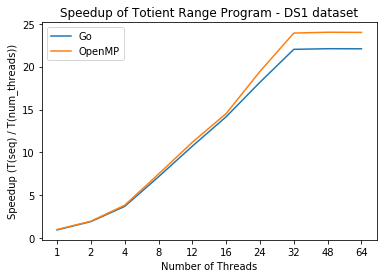

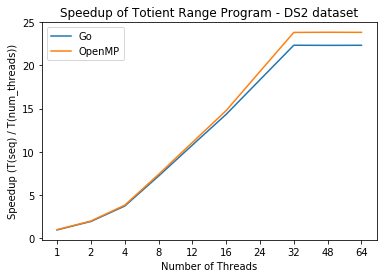

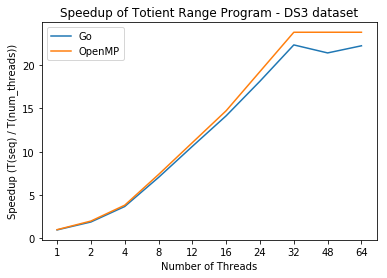

In [17]:
speedups_go = dict()
speedups_omp = dict()

for data_set, times in go_data.items():
    plt.figure()
    plt.title(f'Speedup of Totient Range Program - {dataset_mappings[data_set]} dataset')
    plt.ylabel('Speedup (T(seq) / T(num_threads))')
    plt.xlabel('Number of Threads')
    
    speedups_go[data_set] = dict()
    speedups_omp[data_set] = dict()
    
    ds_x_go = []
    ds_y_go = []
    for threads, time in list(go_data[data_set].items())[1:]:
        ds_x_go.append(threads)
        ds_y_go.append(times['sequential']/time)
        speedups_go[data_set][threads] = times['sequential']/time
        
    ds_x_openmp = []
    ds_y_openmp = []
    for threads, time in list(openmp_data[data_set].items())[1:]:
        ds_x_openmp.append(threads)
        ds_y_openmp.append(openmp_data[data_set]['sequential']/time)
        speedups_omp[data_set][threads] = openmp_data[data_set]['sequential']/time
        
    plt.plot(ds_x_go, ds_y_go, label='Go')
    plt.plot(ds_x_openmp, ds_y_openmp, label='OpenMP')
    plt.legend()

In [18]:
pd.DataFrame(speedups_go)

,15000,30000,60000
1,0.972815,0.973772,0.972170
12,10.732057,10.781295,10.616172
16,14.162591,14.334898,14.144605
2,1.943095,1.949971,1.886748
24,18.184573,18.332527,18.138882
32,22.014866,22.324746,22.325804
4,3.714951,3.729496,3.673548
48,22.089094,22.310096,21.400876
64,22.079533,22.318854,22.224292
8,7.163729,7.194641,7.030908


In [19]:
pd.DataFrame(speedups_omp)

,15000,30000,60000
1,1.015367,1.001029,0.999744
12,11.189835,11.085909,11.047618
16,14.532528,14.771487,14.728193
2,1.985936,2.005475,1.995179
24,19.445791,19.294931,19.255039
32,23.910769,23.807393,23.786105
4,3.853653,3.832832,3.824692
48,24.007951,23.826481,23.788165
64,23.990199,23.815087,23.786942
8,7.479956,7.390228,7.365411
